## Visualize Mnist

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



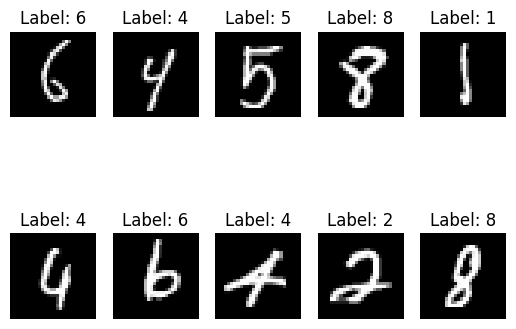

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Define a function to load and plot MNIST images
def plot_mnist_images():
    # Load the MNIST dataset
    transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    mnist_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=transform, download=True)

    # Create a data loader to iterate through the dataset
    data_loader = torch.utils.data.DataLoader(mnist_dataset, batch_size=10, shuffle=True)

    # Plot the first 10 images from the dataset
    for images, labels in data_loader:
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow(images[i].squeeze().numpy(), cmap='gray')
            plt.title(f'Label: {labels[i]}')
            plt.axis('off')
        plt.show()
        break  # Only plot the first batch

if __name__ == '__main__':
    plot_mnist_images()

## Using Softmax

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=transform, download=False)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


# Input and output dimensions
input_dim = 28 * 28  # MNIST images are 28x28
output_dim = 10      # 10 classes for MNIST

# Create a Sequential model
model = nn.Sequential(nn.Flatten(),
                       nn.Linear(input_dim, output_dim))


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 5
losses = []  # to store the average loss for each epoch

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        predicted = torch.argmax(outputs.data, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on 10,000 test images: {100 * correct / total:.2f}%')


Epoch [1/5], Loss: 0.3862
Epoch [2/5], Loss: 0.4360
Epoch [3/5], Loss: 0.2109
Epoch [4/5], Loss: 0.4628
Epoch [5/5], Loss: 0.3374
Accuracy on 10,000 test images: 91.91%


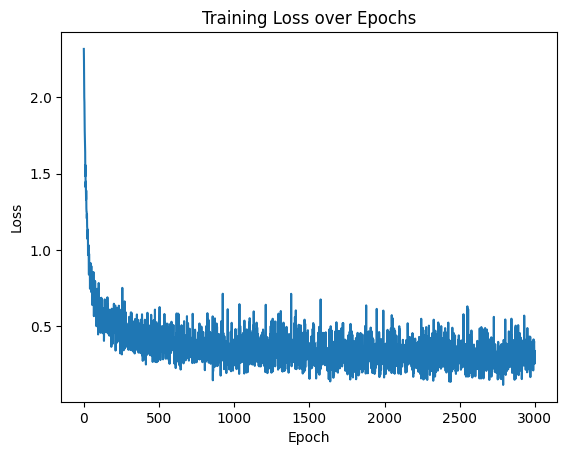

In [3]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()